## Ex1: Random data

In [1]:
#Tao vector x co 100 ohan tu ngay nhien tu 1-100
x <- floor(runif(100, min = 1, max = 101))
y <- floor(runif(100, min = 1, max = 101))
print(x[1:10])
print(y[1:10])

 [1] 70 80 60 74 42 82 98 35 68 40
 [1]  87  37  72  22  84  18  14  87  39 100


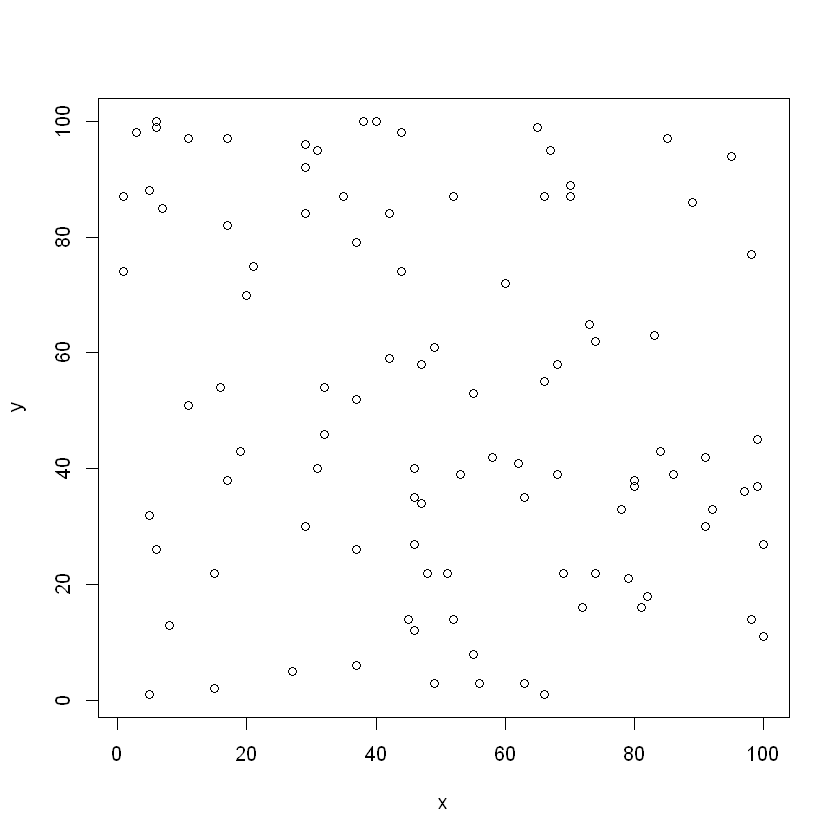

In [2]:
#Plot
plot(x = x, y = y, xlab = "x", ylab = "y")

In [3]:
#Tim k
mydata <- data.frame(x=x, y=y)
print(head(mydata))

   x  y
1 70 87
2 80 37
3 60 72
4 74 22
5 42 84
6 82 18


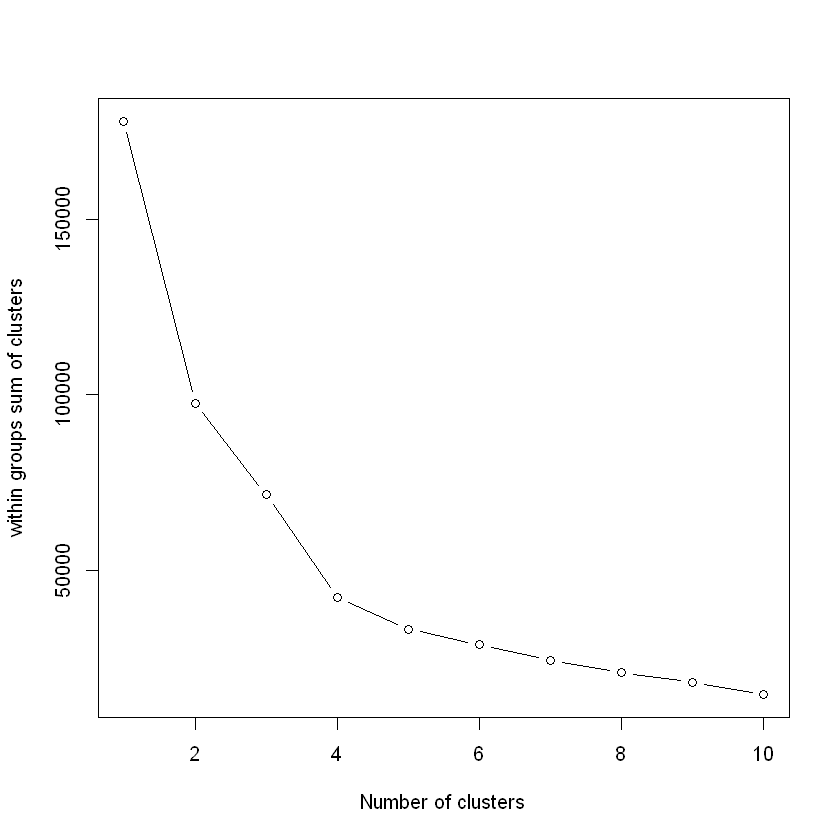

In [4]:
wss <- (nrow(mydata) -1)*sum(apply(mydata,2,var))
for(i in 1:10) wss[i] <- sum(kmeans(mydata, centers = i)$withinss)
plot(1:10, wss, type="b", xlab = "Number of clusters", ylab = "within groups sum of clusters")

**chọn k=4**

In [5]:
#clustering
set.seed(42)
datacluster <- kmeans(mydata, centers = 4, nstart = 20)
print(datacluster)

K-means clustering with 4 clusters of sizes 22, 31, 21, 26

Cluster means:
         x        y
1 21.31818 89.40909
2 32.87097 26.25806
3 67.52381 75.14286
4 81.23077 28.50000

Clustering vector:
  [1] 3 4 3 4 1 4 4 1 4 1 2 1 1 3 2 3 3 1 2 2 4 2 1 4 3 3 4 1 2 3 4 3 1 4 1 2 2
 [38] 3 4 1 2 1 1 4 3 4 2 4 1 4 4 3 4 3 3 3 1 2 2 1 2 4 1 4 2 2 1 3 2 3 2 2 2 2
 [75] 2 2 3 1 2 4 2 4 4 1 2 3 1 2 4 4 4 2 2 2 1 4 2 3 2 3

Within cluster sum of squares by cluster:
[1]  6370.091 17079.419 10119.810  8579.115
 (between_SS / total_SS =  76.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      


In [6]:
datacluster$cluster

[1] 3 4 3 4 1 4 4 1 4 1 2 1 1 3 2 3 3 1 2 2 4 2 1 4 3 3 4 1 2 3 4 3 1 4 1 2 2
 [38] 3 4 1 2 1 1 4 3 4 2 4 1 4 4 3 4 3 3 3 1 2 2 1 2 4 1 4 2 2 1 3 2 3 2 2 2 2
 [75] 2 2 3 1 2 4 2 4 4 1 2 3 1 2 4 4 4 2 2 2 1 4 2 3 2 3

In [7]:
print("Centroid points:")
print(datacluster$centers)

[1] "Centroid points:"
         x        y
1 21.31818 89.40909
2 32.87097 26.25806
3 67.52381 75.14286
4 81.23077 28.50000


In [8]:
library(factoextra)

Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


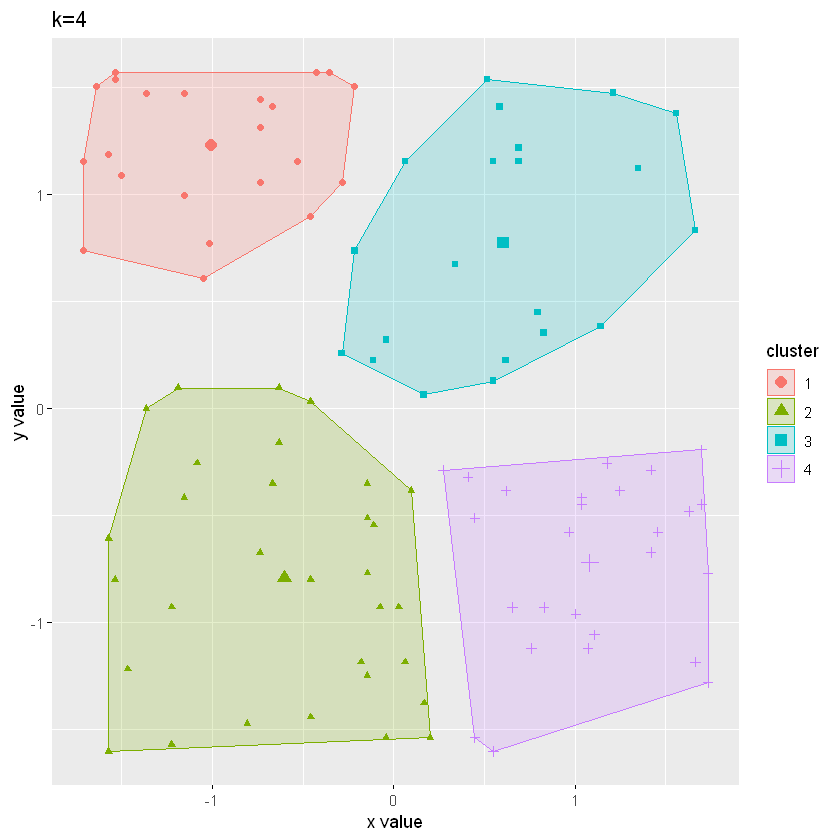

In [9]:
fviz_cluster(datacluster, geom = "point", data = mydata) + ggtitle("k=4")

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

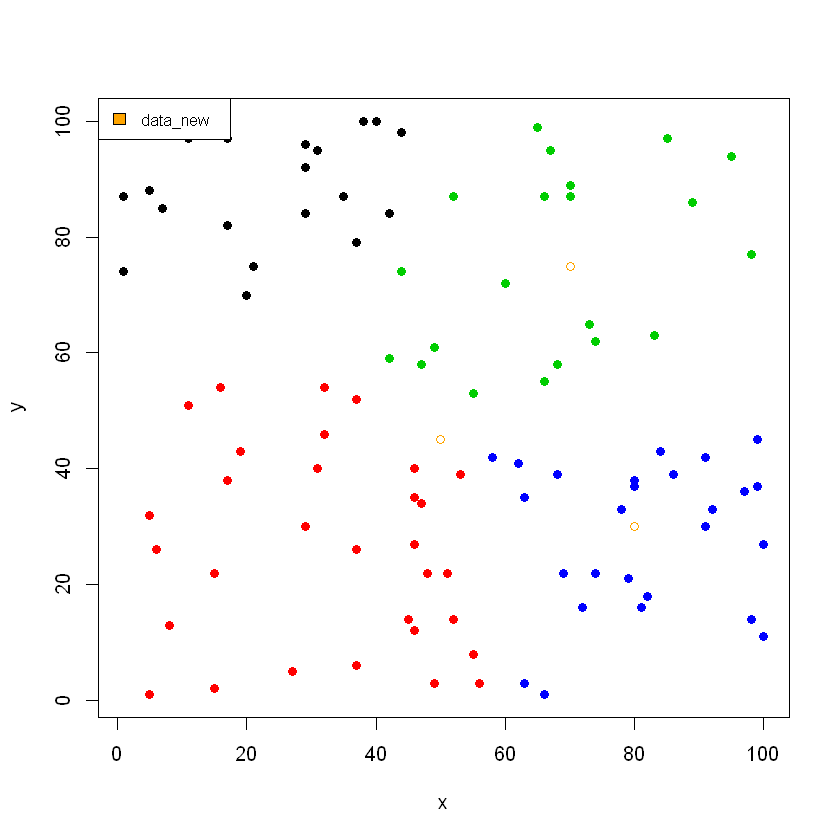

In [10]:
#trực quan hóa dữ liệu mới
x_new <- c(80, 50, 70)
y_new <- c(30, 45, 75)
new_data <- data.frame(x=x_new, y=y_new)
datacluster$cluster <- as.factor(datacluster$cluster)
plot(x= mydata$x, y= mydata$y, xlab = "x", ylab = "y", col= datacluster$cluster, pch = 19)
lines(x_new,y_new, col = "orange", type = "p")
legend("topleft", c("data_new"), cex = 0.8, fill = c("orange"))

In [11]:
library(ClusterR)

Warning message:
"package 'ClusterR' was built under R version 3.6.3"Loading required package: gtools
Warning message:
"package 'gtools' was built under R version 3.6.3"

In [12]:
#Cach 1:
pred_new = predict_KMeans(new_data, datacluster[["centers"]])

In [13]:
print("Predict newdata 1:")
print(pred_new)

[1] "Predict newdata 1:"
[1] 4 2 3
attr(,"class")
[1] "k-means clustering"


In [14]:
#Cach 2
clusters <- function(x, centers) {
  # compute squared euclidean distance from each sample to each cluster center
  tmp <- sapply(seq_len(nrow(x)),
                function(i) apply(centers, 1,
                                  function(v) sum((x[i, ]-v)^2)))
  max.col(-t(tmp))  # find index of min distance
}

In [15]:
new <- clusters(new_data, datacluster[["centers"]])

In [16]:
print("Predict newdata 2:")
print(new)

[1] "Predict newdata 2:"
[1] 4 2 3


## Ex2: Shopping

In [17]:
#Doc du lieu shopping_data.csv
data <- read.csv("Chapter 18-19\\shopping_data.csv")
head(data)

CustomerID,Genre,Age,Annual.Income..k..,Spending.Score..1.100.
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76


In [18]:
#Xem thong tin
print(tail(data))
print(paste("No rows: ", nrow(data)))
print(paste("No columns: ", ncol(data)))
print(summary(data))

    CustomerID  Genre Age Annual.Income..k.. Spending.Score..1.100.
195        195 Female  47                120                     16
196        196 Female  35                120                     79
197        197 Female  45                126                     28
198        198   Male  32                126                     74
199        199   Male  32                137                     18
200        200   Male  30                137                     83
[1] "No rows:  200"
[1] "No columns:  5"
   CustomerID        Genre          Age        Annual.Income..k..
 Min.   :  1.00   Female:112   Min.   :18.00   Min.   : 15.00    
 1st Qu.: 50.75   Male  : 88   1st Qu.:28.75   1st Qu.: 41.50    
 Median :100.50                Median :36.00   Median : 61.50    
 Mean   :100.50                Mean   :38.85   Mean   : 60.56    
 3rd Qu.:150.25                3rd Qu.:49.00   3rd Qu.: 78.00    
 Max.   :200.00                Max.   :70.00   Max.   :137.00    
 Spending.Score..1.10

In [19]:
str(data)

'data.frame':	200 obs. of  5 variables:
 $ CustomerID            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Genre                 : Factor w/ 2 levels "Female","Male": 2 2 1 1 1 1 1 1 2 1 ...
 $ Age                   : int  19 21 20 23 31 22 35 23 64 30 ...
 $ Annual.Income..k..    : int  15 15 16 16 17 17 18 18 19 19 ...
 $ Spending.Score..1.100.: int  39 81 6 77 40 76 6 94 3 72 ...


In [22]:
#Tao dataframe voi 2 cot Annual.Income..k.. & Spending.Score..1.100.
shopping <- subset(data, select = c(4,5))
head(shopping)

Annual.Income..k..,Spending.Score..1.100.
15,39
15,81
16,6
16,77
17,40
17,76


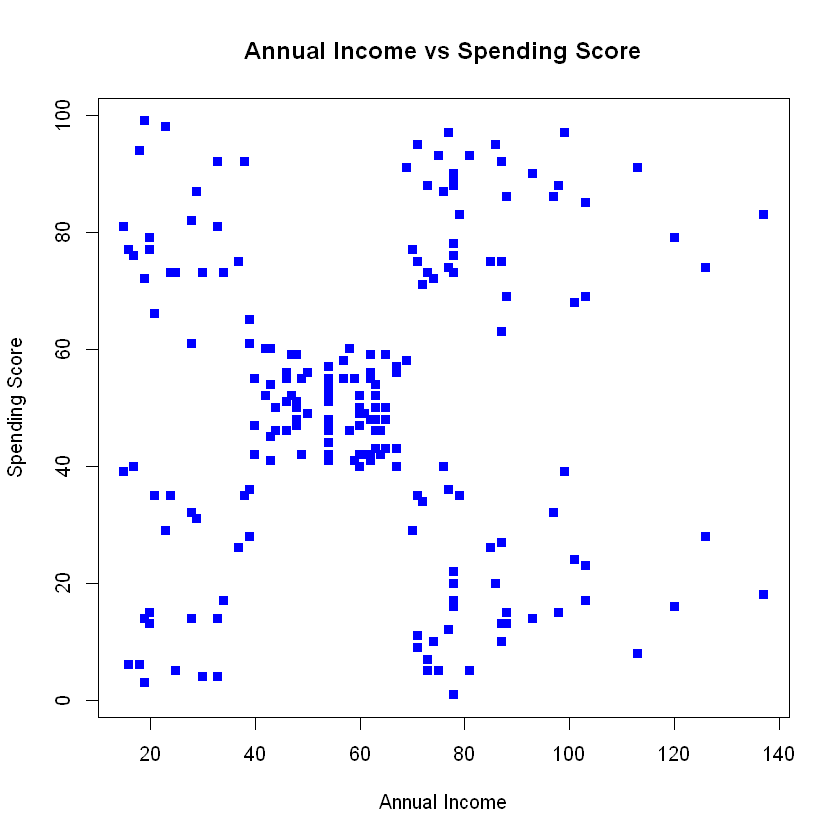

In [24]:
#Visualize
plot(x = shopping$Annual.Income..k.., y = shopping$Spending.Score..1.100., xlab = "Annual Income", ylab = "Spending Score",
    main = "Annual Income vs Spending Score", col = "blue", pch = 15)

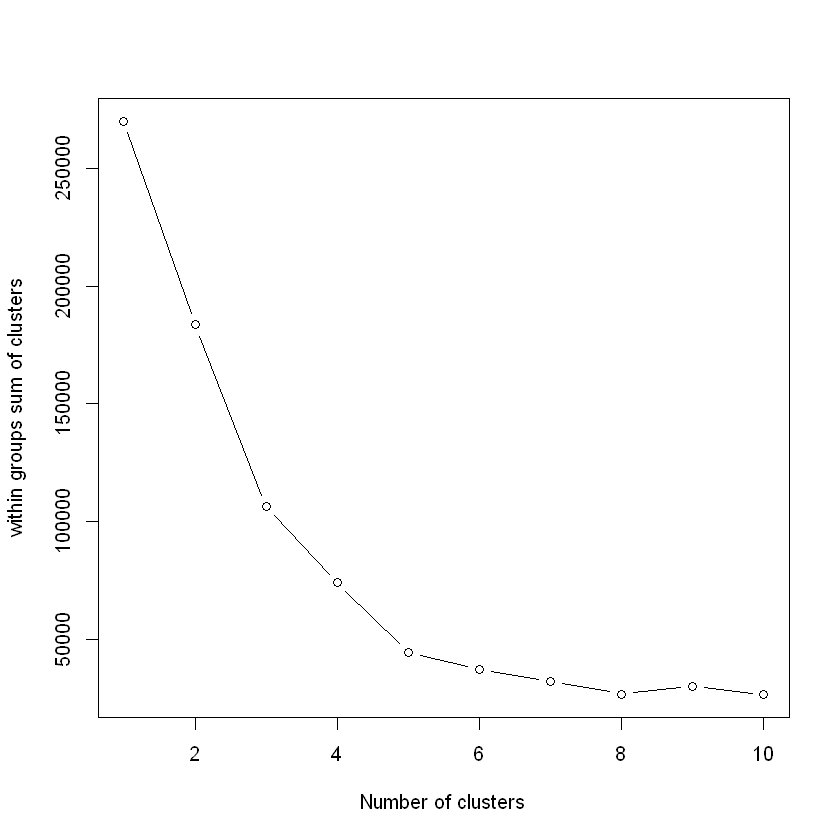

In [25]:
#Ap dung elbow tim k
wss <- (nrow(shopping) -1)*sum(apply(shopping,2,var))
for(i in 1:10) wss[i] <- sum(kmeans(shopping, centers = i)$withinss)
plot(1:10, wss, type="b", xlab = "Number of clusters", ylab = "within groups sum of clusters")

**Chọn k=5**

In [26]:
#clustering
set.seed(42)
shopping.cluster <- kmeans(shopping, centers = 5, nstart = 20)
print(shoppingping.cluster)

K-means clustering with 5 clusters of sizes 23, 22, 39, 81, 35

Cluster means:
  Annual.Income..k.. Spending.Score..1.100.
1           26.30435               20.91304
2           25.72727               79.36364
3           86.53846               82.12821
4           55.29630               49.51852
5           88.20000               17.11429

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   2   1   2   1   2   1   2   1   2   1   2   1   2   1   2   1   2   1   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   2   1   2   1   2   1   2   1   2   1   2   1   2   1   2   1   2   1   2 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   2   1   4   1   2   4   4   4   4   4   4   4   4   4   4   4   4   4   4 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   4   

In [27]:
library(factoextra)

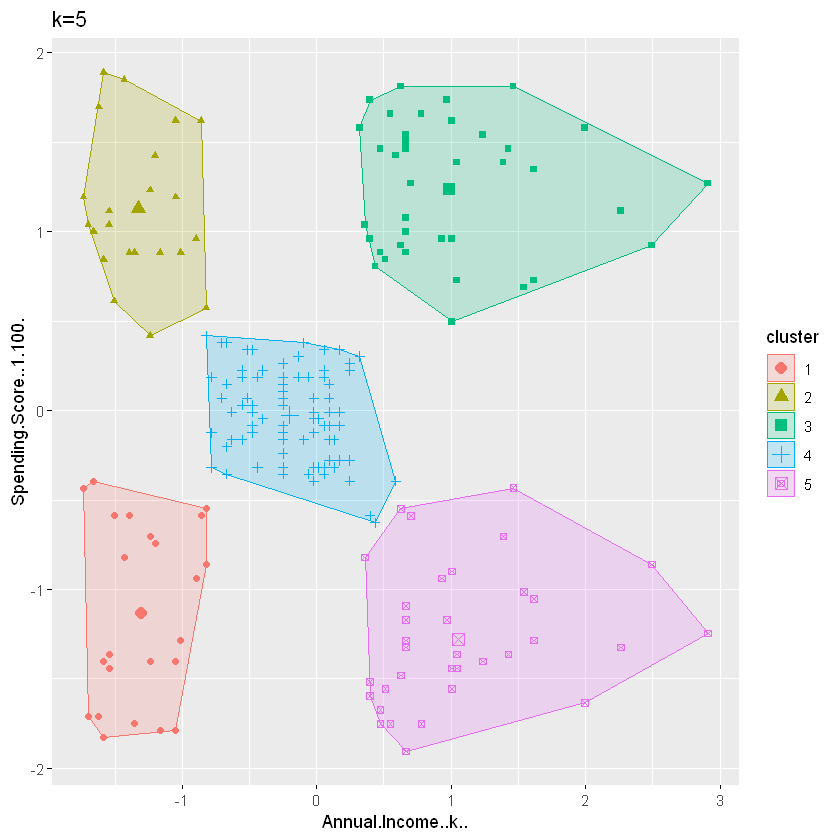

In [28]:
fviz_cluster(shopping.cluster, geom = "point", data = shopping) + ggtitle("k=5")

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

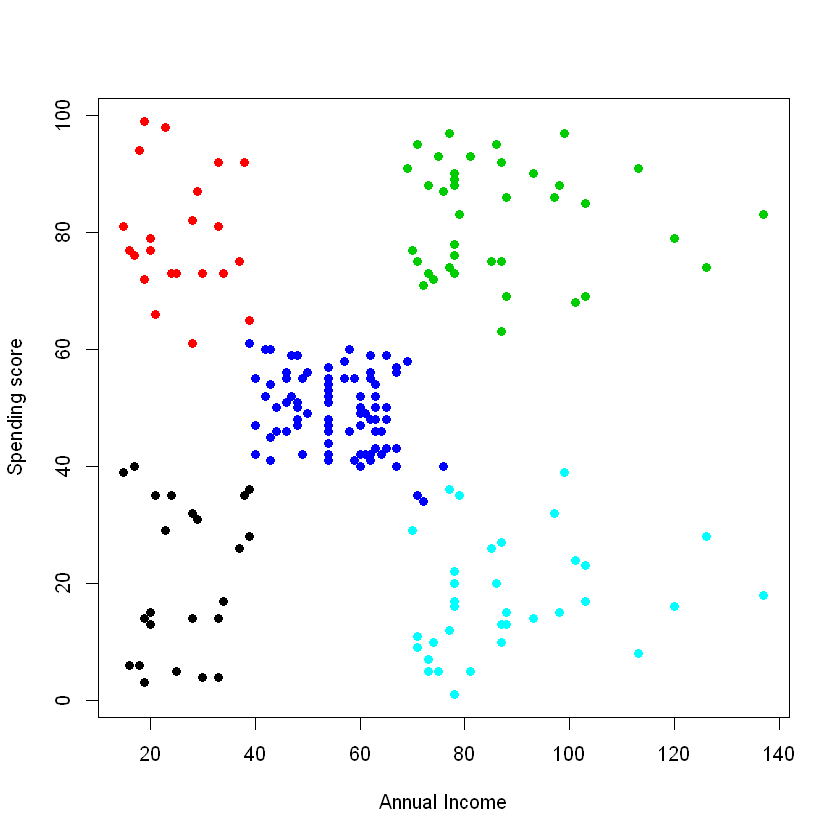

In [29]:
#trực quan hóa dữ liệu 
shopping.cluster$cluster <- as.factor(shopping.cluster$cluster)
plot(x= shopping$Annual.Income..k.., y= shopping$Spending.Score..1.100., xlab = "Annual Income", ylab = "Spending score", 
     col= shopping.cluster$cluster, pch = 19)
#lines(x,y, col = "blue", type = "p")
#legend("topleft", c("data_new"), cex = 0.8, fill = c("blue"))

**Nhận xét**: Dựa vào biểu đồ ta thấy 5 nhóm có đặc tính như sau:
+ Nhóm có Income thấp và spend ít
+ Nhóm có Income trung bình và spend trung bình
+ Nhóm có Income cao và spend ít
+ Nhóm có Income thấp và spend nhiều
+ Nhóm có Income cao và spend nhiều